### Linear Regression realization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# plt.rcParams['figure.figsize'] = (8, 8)

In [ ]:
class ZNormalizer(object):
    def fit(self,x):
        self.mean = x.mean(axis=0)
        self.std = x.std(axis=0)
    
    def transform(self,x):
        return (x - self.mean) / self.std  

def plot_loss_surface(x, y, weights, loss):
    lim = 4
    
    min = weights.min(0)
    max = weights.max(0)
    
    w1 = np.linspace(min[0] - lim, max[0] + lim)
    w2 = np.linspace(min[1] - lim, max[1] + lim)
    W1, W2 = np.meshgrid(w1, w2)
    Z = np.zeros((w1.size, w2.size))

    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            model = LinReg(W1[i, j], W2[i, j])
            y_hat = model.predict(x)
            Z[i, j] = loss(y, y_hat)

    plt.contourf(W1, W2, Z, cmap=cm.coolwarm, levels=100)
    plt.scatter(weights[:, 0], weights[:, 1], marker='x', c='white')
    plt.show()
    
def plot_decision_line(x, y, model):
    i = np.argsort(x)
    x = x[i]
    y = y[i]
    
    plt.scatter(x, y, s=5)
    y_hat = model.predict(x)
    plt.scatter(x, y_hat, s=5)
    plt.fill_between(x, y, y_hat, alpha=0.1)
    plt.show()
    
def load_data():
    rng = np.random.RandomState(42)
    
    x = np.linspace(10, 100, 100) * -0.5 - 4
    y = x * -0.5 + -4 + rng.standard_normal(x.shape) * 2
    
    return x, y

In [5]:
### mse function for measuring the mean square error

def mse(y, y_hat):
    err = y - y_hat
    return np.mean(err**2)

In [6]:
### function shuffle_and_split for splitting data into 2 random samples

def shuffle_and_split(x, y, k):
    
    i = np.random.permutation(x.shape[0])
    x = x[i]
    y = y[i]
    
    n = int(100 * k)
    x_train = x[:n]
    y_train = y[:n]
    
    x_test = x[n:]
    y_test = y[n:]
    
    return (x_train, y_train), (x_test, y_test)

In [7]:
### load data, separate and normalize

x, y = load_data()

(x_train, y_train), (x_test, y_test) = shuffle_and_split(x, y, 0.6)

normalizer = ZNormalizer()
normalizer.fit(x_train)

x = normalizer.transform(x)
x_train = normalizer.transform(x_train)
x_test = normalizer.transform(x_test)


In [8]:

class LinReg(object):
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
    def predict(self, x):
        x = np.array(x)
        return self.w * x + self.b
    
    def fit(self, x, y, learning_rate):
        y_hat = self.predict(x)
        
        dw = -2*(x*(y-y_hat)).mean()
        db = -2*(y-y_hat).mean()
        
        self.w = self.w - learning_rate * dw
        self.b = self.b - learning_rate * db
        

epoch 0, train loss 183.24, test loss 194.37


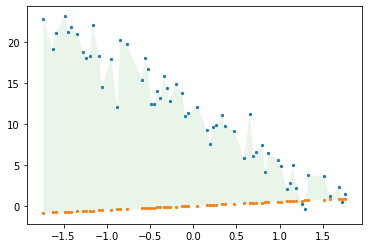

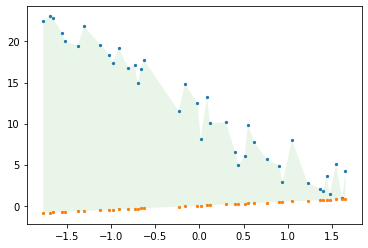

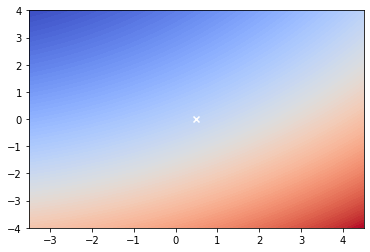

epoch 10, train loss 25.31, test loss 26.80


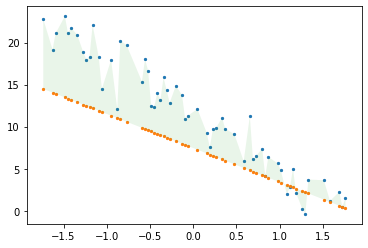

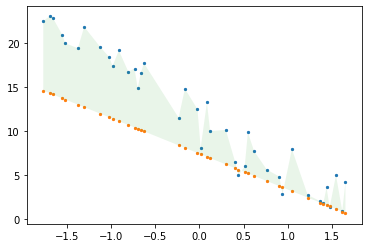

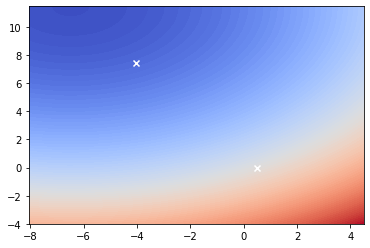

epoch 20, train loss 6.11, test loss 6.07


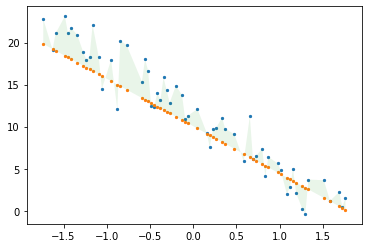

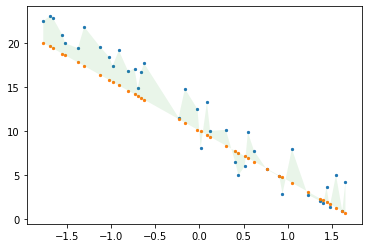

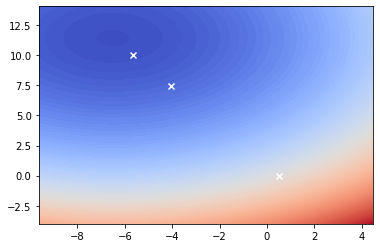

epoch 30, train loss 3.78, test loss 3.43


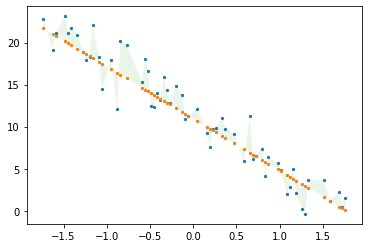

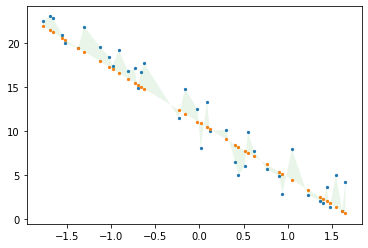

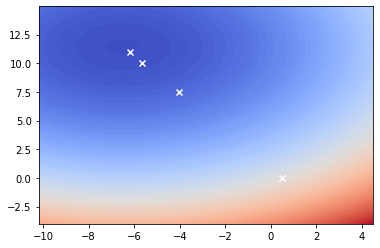

epoch 40, train loss 3.49, test loss 3.06


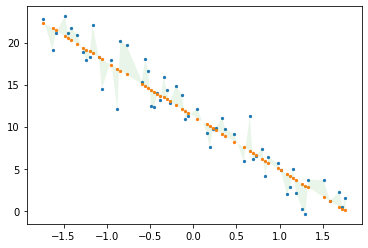

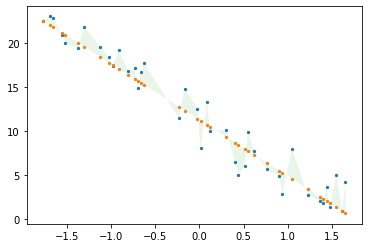

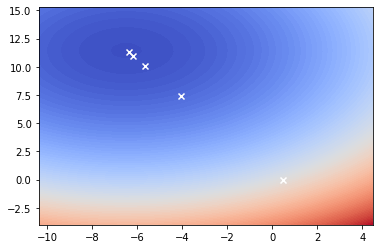

epoch 50, train loss 3.46, test loss 3.00


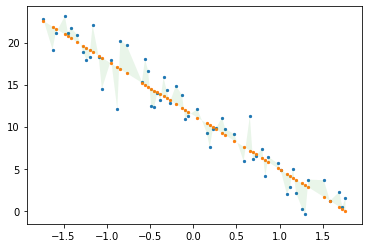

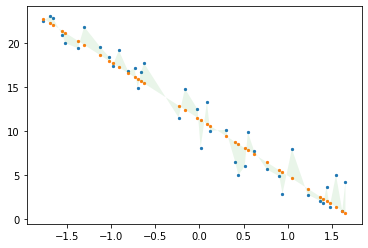

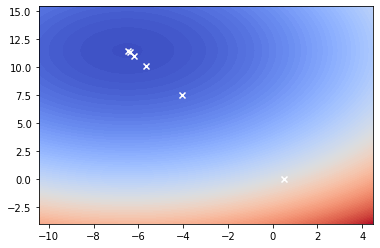

epoch 60, train loss 3.45, test loss 2.99


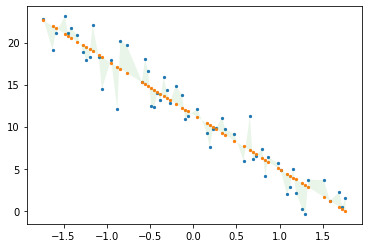

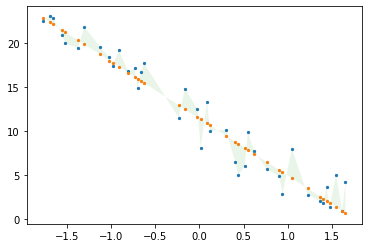

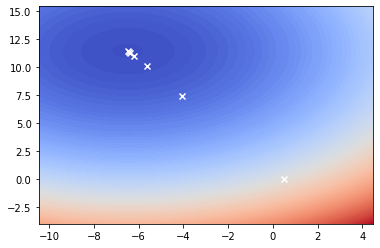

epoch 70, train loss 3.45, test loss 2.99


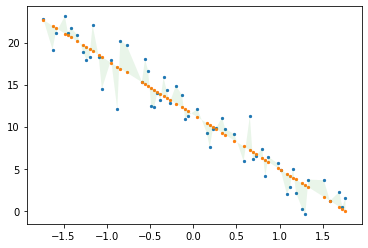

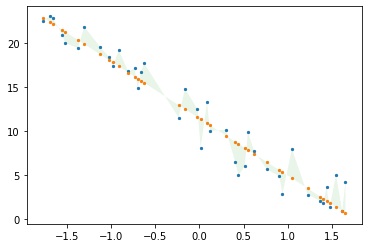

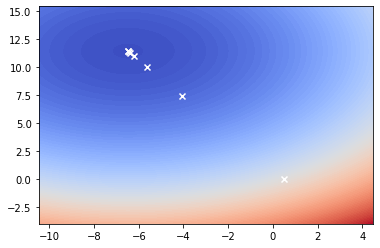

epoch 80, train loss 3.45, test loss 2.98


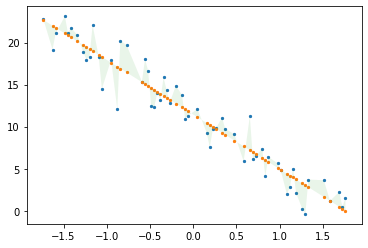

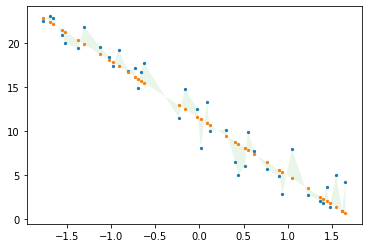

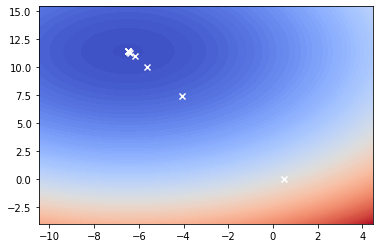

epoch 90, train loss 3.45, test loss 2.98


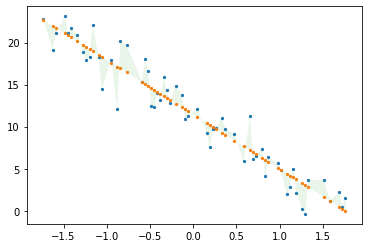

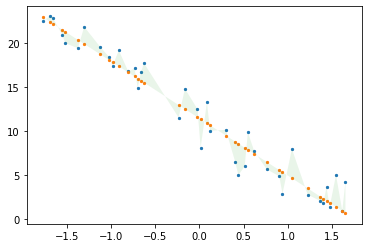

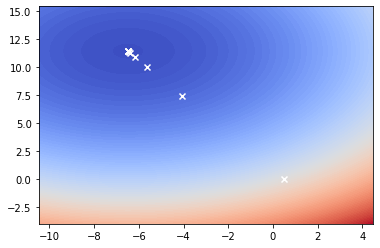

In [10]:
rng = np.random.RandomState(42)
model = LinReg(rng.standard_normal(), 0.)
learning_rate = 1e-1 / 2

weights = []
for epoch in range(100):    
    if epoch % 10 == 0:
        y_hat_train = model.predict(x_train)
        y_hat_test = model.predict(x_test)
        
        train_loss = mse(y_train, y_hat_train)
        test_loss = mse(y_test, y_hat_test)
        
        print('epoch {}, train loss {:.2f}, test loss {:.2f}'.format(epoch, train_loss, test_loss))
        
        weights.append([model.w, model.b])
        
        plot_decision_line(x_train, y_train, model)
        plot_decision_line(x_test, y_test, model)
        plot_loss_surface(x_train, y_train, np.array(weights), mse)

    model.fit(x_train, y_train, learning_rate)   